# Forecasting Financial Statements with `finstmt`

> Note: The plots are not coming through and the formatting of the statements is off in the web view. Download the Jupyter notebook for the full experience.

First import the necessary classes and `pandas`.

In [1]:
import os
os.chdir('..')
from finstmt import FinancialStatements, IncomeStatements, BalanceSheets
import pandas as pd

## Load Financial Statements

In [2]:
root_folder = os.path.sep.join(['tests', 'sources', 'stockrow', 'CAT'])

inc_path = os.path.join(root_folder, 'annual_income.csv')
bs_path = os.path.join(root_folder, 'annual_bs.csv')

inc_df = pd.read_csv(inc_path, index_col=0)
bs_df = pd.read_csv(bs_path, index_col=0)

bs = BalanceSheets.from_df(bs_df)
inc = IncomeStatements.from_df(inc_df)
stmts = FinancialStatements(inc, bs)

INFO: Was not able to extract data from the following names: {'Investments', 'Other Liabilities', 'Net Debt', 'Other Assets'}
INFO: Was not able to extract data from the following names: {'Consolidated Income', 'Gross Profit', 'Dividend per Share', 'Preferred Dividends', 'Shares (weighted, diluted)', 'Net Income - Discontinued ops', 'Net Income - Non-Controlling int', 'EBIT Margin', 'Gross Margin', 'Net Income Com', 'Free Cash Flow margin', 'Earnings Before Tax Margin', 'EPS', 'EBITDA', 'EPS Diluted', 'Shares (weighted)', 'Revenue Growth', 'Net Profit Margin', 'Profit Margin', 'EBITDA Margin', 'Shares (basic)'}


c:\Users\CarbonX1\Documents\GitHub\py-finstmt\finstmt\findata\database.py:88: UserWarning: Previously had ebit extracted from "Operating Income". Replacing with value from "EBIT"
  warnings.warn(


### View Existing Statements

In [3]:
stmts

,12/31/2009,12/31/2010,12/31/2011,12/31/2012,12/31/2013,12/31/2014,12/31/2015,12/31/2016,12/31/2017,12/31/2018
Revenue,"$32,396,000,000","$42,588,000,000","$60,138,000,000","$65,875,000,000","$55,656,000,000","$55,184,000,000","$47,011,000,000","$38,537,000,000","$45,462,000,000","$54,722,000,000"
Cost of Goods Sold,"$24,931,000,000","$31,281,000,000","$44,404,000,000","$47,852,000,000","$41,454,000,000","$41,342,000,000","$34,133,000,000","$28,640,000,000","$31,906,000,000","$37,719,000,000"
Gross Profit,"$7,465,000,000","$11,307,000,000","$15,734,000,000","$18,023,000,000","$14,202,000,000","$13,842,000,000","$12,878,000,000","$9,897,000,000","$13,556,000,000","$17,003,000,000"
R&D Expense,"$1,421,000,000","$1,905,000,000","$2,297,000,000","$2,466,000,000","$2,046,000,000","$2,380,000,000","$2,119,000,000","$1,853,000,000","$1,842,000,000","$1,850,000,000"
SG&A Expense,"$3,645,000,000","$4,248,000,000","$5,203,000,000","$5,919,000,000","$5,547,000,000","$6,529,000,000","$4,951,000,000","$4,383,000,000","$4,999,000,000","$5,478,000,000"
Depreciation & Amortization Expense,-,-,-,-,-,-,-,-,-,-
Other Operating Expenses,-,-,-,-,-,-,-,-,-,-
Operating Expense,"$6,888,000,000","$7,344,000,000","$8,581,000,000","$9,450,000,000","$8,574,000,000","$10,528,000,000","$9,093,000,000","$8,735,000,000","$9,096,000,000","$8,710,000,000"
Earnings Before Interest and Taxes,"$1,014,000,000","$4,011,000,000","$7,044,000,000","$8,676,000,000","$5,573,000,000","$3,628,000,000","$3,935,000,000","$630,000,000","$4,624,000,000","$8,249,000,000"
Interest Expense,"$389,000,000","$343,000,000","$396,000,000","$467,000,000","$465,000,000","$484,000,000","$507,000,000","$505,000,000","$531,000,000","$404,000,000"


### Copy the Statements

To set up for running multiple forecasts off the same data, you can make a copy of it using `stmts.copy()`. Then any adjustments to the configuration will only be in the original object and not the copy.

In [4]:
stmts2 = stmts.copy()

## Run a Forecast

### Set the Default Method

This is not a necessary step, but this is the way to change the default forecast method. The default is already `cagr` and so this doesn't actually have an effect.

In [5]:
stmts.config.update_all(['forecast_config', 'method'], 'cagr')

## View the Forecast Assumptions

All the assumptions going into the forecast are in `forecast_assumptions`:

In [6]:
stmts.forecast_assumptions

,Method,% of,Cap,Floor,Plug
Revenue,cagr,None,None,None,False
Cost of Goods Sold,cagr,revenue,None,None,False
R&D Expense,cagr,None,None,None,False
SG&A Expense,cagr,None,None,None,False
Interest Expense,cagr,total_debt,None,None,False
Income Tax Expense,cagr,ebt,None,None,False
Cash and Cash Equivalents,cagr,None,None,None,True
Receivables,cagr,revenue,None,None,False
Inventory,cagr,revenue,None,None,False
"Net Property, Plant & Equipment",cagr,None,None,None,False


### Run the First Forecast

Forecasts are run using `.forecast()` and produce `ForecastedFinancialStatements`. It is usually good practice to first run a forecast, then view the results, then adjust as needed.

In [7]:
fcst = stmts.forecast()

INFO: Forecasting Income Statement


  6%|▋         | 1/16 [00:00<00:01,  8.27it/s]c:\Users\CarbonX1\Documents\GitHub\py-finstmt\finstmt\forecast\models\cagr.py:39: UserWarning: CAGR not an appropriate method for Income Tax Expense as y_0 is negative. Setting to 0 growth (recent value forecast)
  warnings.warn(message)
100%|██████████| 16/16 [00:00<00:00, 67.80it/s]

INFO: Forecasting Balance Sheet



 14%|█▎        | 5/37 [00:00<00:00, 44.77it/s]c:\Users\CarbonX1\Documents\GitHub\py-finstmt\finstmt\forecast\models\cagr.py:39: UserWarning: CAGR not an appropriate method for Long-Term Investments as y_T is 0. Setting to 0 growth (recent value forecast)
  warnings.warn(message)
 49%|████▊     | 18/37 [00:00<00:00, 83.07it/s]c:\Users\CarbonX1\Documents\GitHub\py-finstmt\finstmt\forecast\models\cagr.py:39: UserWarning: CAGR not an appropriate method for Other Comprehensive Income as y_0 is negative, y_T is negative. Setting to 0 growth (recent value forecast)
  warnings.warn(message)
100%|██████████| 37/37 [00:00<00:00, 114.25it/s]


INFO: Balancing balance sheet
INFO: Balanced in 0.5s


> Note: Warnings are raised because CAGR is the default method but it is not suitable for items which begin with 0

Now view the forecast.

In [8]:
fcst

,12/31/2019,12/31/2020,12/31/2021,12/31/2022,12/31/2023
Revenue,"$57,667,220,438","$60,770,957,074","$64,041,741,490","$67,488,564,448","$71,120,900,608"
Cost of Goods Sold,"$39,313,545,944","$40,975,500,271","$42,707,712,625","$44,513,153,118","$46,394,917,421"
Gross Profit,"$18,353,674,493","$19,795,456,804","$21,334,028,865","$22,975,411,330","$24,725,983,186"
R&D Expense,"$1,899,457,118","$1,950,236,402","$2,002,373,198","$2,055,903,797","$2,110,865,460"
SG&A Expense,"$5,705,772,841","$5,943,016,376","$6,190,124,394","$6,447,507,055","$6,715,591,574"
Depreciation & Amortization Expense,-,-,-,-,-
Other Operating Expenses,-,-,-,-,-
Operating Expense,"$7,605,229,959","$7,893,252,778","$8,192,497,592","$8,503,410,852","$8,826,457,034"
Earnings Before Interest and Taxes,"$10,748,444,535","$11,902,204,025","$13,141,531,274","$14,472,000,479","$15,899,526,152"
Interest Expense,"$415,740,590","$418,147,270","$421,436,796","$425,677,315","$430,948,096"


And the plot:

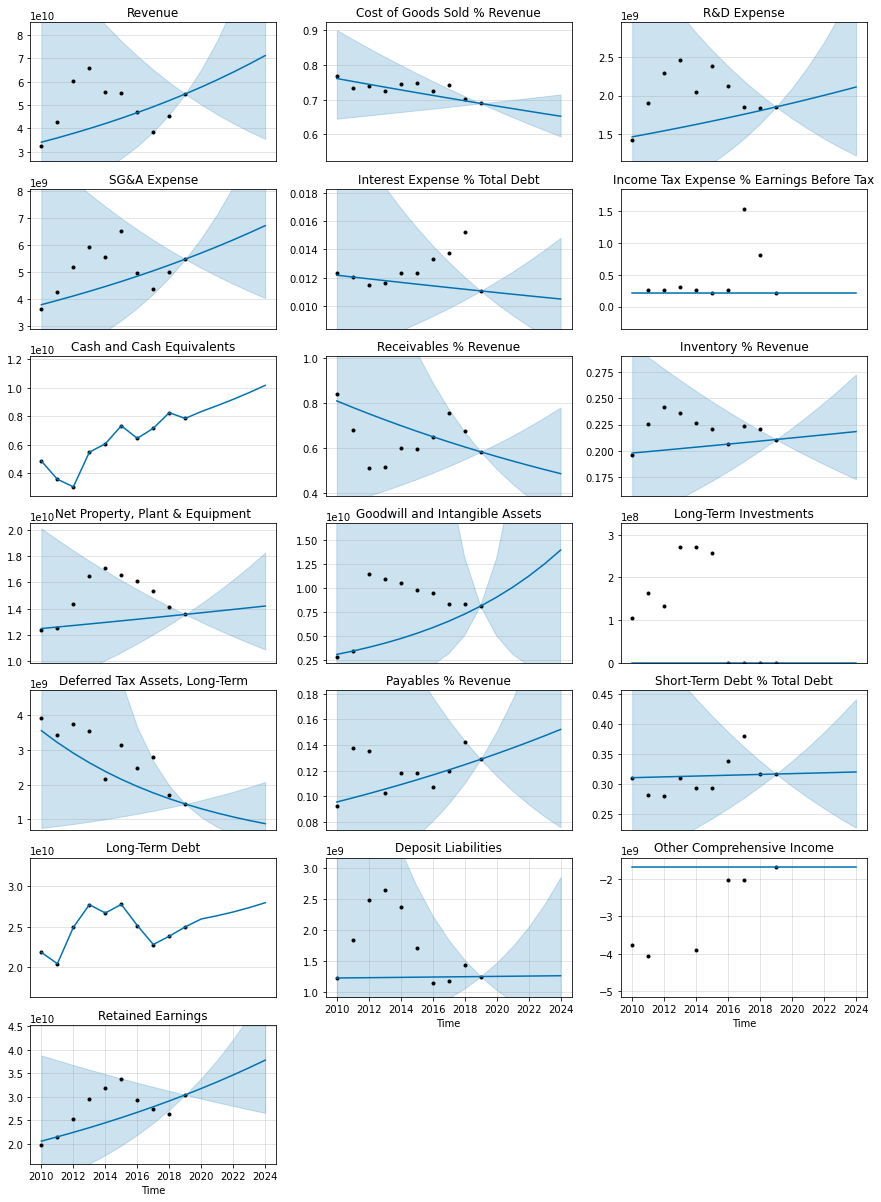

In [9]:
fcst.plot()

It is also possible to plot a subset. Let's focus on only a few items for sake of example.

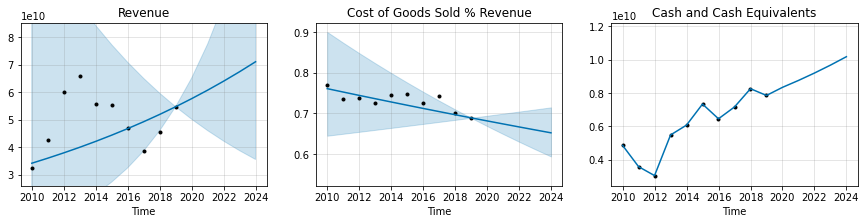

In [10]:
fcst.plot(subset=['revenue', 'cogs', 'cash'])

### Change Methods and Re-Run Forecast

After viewing the plots, the appropriate methods for forecasting each item should be chosen. Then they can be updated.

In [11]:
stmts.config.update('revenue', ['forecast_config', 'method'], 'trend')
stmts.config.update('cogs', ['forecast_config', 'method'], 'mean')

Now re-run the forecast.

In [12]:
fcst = stmts.forecast()

INFO: Forecasting Income Statement


 31%|███▏      | 5/16 [00:00<00:00, 47.36it/s]c:\Users\CarbonX1\Documents\GitHub\py-finstmt\finstmt\forecast\models\cagr.py:39: UserWarning: CAGR not an appropriate method for Income Tax Expense as y_0 is negative. Setting to 0 growth (recent value forecast)
  warnings.warn(message)
100%|██████████| 16/16 [00:00<00:00, 109.43it/s]

INFO: Forecasting Balance Sheet



  0%|          | 0/37 [00:00<?, ?it/s]c:\Users\CarbonX1\Documents\GitHub\py-finstmt\finstmt\forecast\models\cagr.py:39: UserWarning: CAGR not an appropriate method for Long-Term Investments as y_T is 0. Setting to 0 growth (recent value forecast)
  warnings.warn(message)
 76%|███████▌  | 28/37 [00:00<00:00, 135.47it/s]c:\Users\CarbonX1\Documents\GitHub\py-finstmt\finstmt\forecast\models\cagr.py:39: UserWarning: CAGR not an appropriate method for Other Comprehensive Income as y_0 is negative, y_T is negative. Setting to 0 growth (recent value forecast)
  warnings.warn(message)
100%|██████████| 37/37 [00:00<00:00, 137.72it/s]


INFO: Balancing balance sheet
INFO: Balanced in 0.0s


And plot the results:

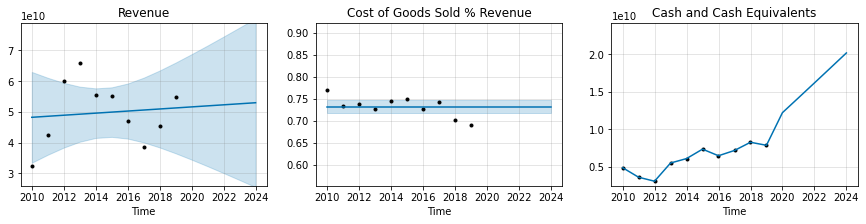

In [13]:
fcst.plot(subset=['revenue', 'cogs', 'cash'])

Now the methods for those forecasts has been updated.

### Adjusting an Existing Forecast

While it is possible to use the `manual` forecast type and pass in the desired growth rates or levels from the beginning, it is often more convenient to first run the forecast, then simply adjust it. The `.to_manual` method of the forecast was added for this purpose.

Either `adjustments` or `replacements` can be passed while updating, and either the level of the item or the growth in the item can be used for the new manual forecast. For either one, a dictionary where the keys are the index of the period and values are the adjustment/replacement or a list containing all the adjustment/replacements can be used.

In [14]:
fcst.forecasts['cash'].to_manual(adjustments={0: 0.4})  # boost first forecast period cash growth by 40%
fcst.forecasts['cogs'].to_manual(use_levels=True, replacements=[0.85 for _ in range(5)])  # use 85% of sales for full COGS forecast
fcst.forecasts['revenue'].to_manual(use_levels=True, replacements={1: 8e10})  # set second forecast period revenue to 80,000,000,000

Then just run the forecast again to get everything updated in the statements. Then you can view the plots:

INFO: Forecasting Income Statement


 62%|██████▎   | 10/16 [00:00<00:00, 93.70it/s]c:\Users\CarbonX1\Documents\GitHub\py-finstmt\finstmt\forecast\models\cagr.py:39: UserWarning: CAGR not an appropriate method for Income Tax Expense as y_0 is negative. Setting to 0 growth (recent value forecast)
  warnings.warn(message)
100%|██████████| 16/16 [00:00<00:00, 115.85it/s]

INFO: Forecasting Balance Sheet



 30%|██▉       | 11/37 [00:00<00:00, 104.97it/s]c:\Users\CarbonX1\Documents\GitHub\py-finstmt\finstmt\forecast\models\cagr.py:39: UserWarning: CAGR not an appropriate method for Long-Term Investments as y_T is 0. Setting to 0 growth (recent value forecast)
  warnings.warn(message)
 59%|█████▉    | 22/37 [00:00<00:00, 80.91it/s] c:\Users\CarbonX1\Documents\GitHub\py-finstmt\finstmt\forecast\models\cagr.py:39: UserWarning: CAGR not an appropriate method for Other Comprehensive Income as y_0 is negative, y_T is negative. Setting to 0 growth (recent value forecast)
  warnings.warn(message)
100%|██████████| 37/37 [00:00<00:00, 106.74it/s]


INFO: Balancing balance sheet
INFO: Balanced in 0.8s


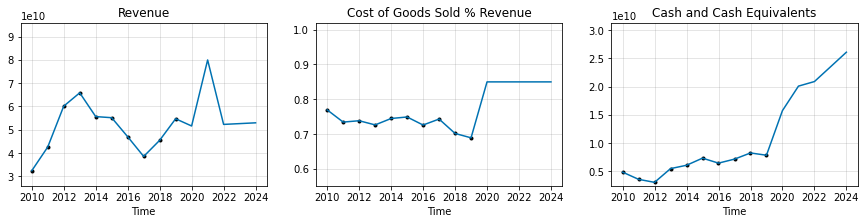

In [15]:
fcst = stmts.forecast()
fcst.plot(subset=['revenue', 'cogs', 'cash'])

## A Second Forecast

Since we earlier did a `deepcopy` of the `stmts` object, that still has the original forecast assumptions and can be used for a separate forecast.

In [16]:
stmts2.forecast_assumptions

,Method,% of,Cap,Floor,Plug
Revenue,cagr,None,None,None,False
Cost of Goods Sold,cagr,revenue,None,None,False
R&D Expense,cagr,None,None,None,False
SG&A Expense,cagr,None,None,None,False
Interest Expense,cagr,total_debt,None,None,False
Income Tax Expense,cagr,ebt,None,None,False
Cash and Cash Equivalents,cagr,None,None,None,True
Receivables,cagr,revenue,None,None,False
Inventory,cagr,revenue,None,None,False
"Net Property, Plant & Equipment",cagr,None,None,None,False
